# Java Jupyter notebook example
You can write normal Java.

In [1]:
var result = 2 + 2;
result

4

In [2]:
// including classes
record Complex(double a, double b) {
    public Complex add(Complex c) {
        return new Complex(a+c.a, b+c.b);
    }
}
Complex x = new Complex(10,20);
x.add(new Complex(1,1))

Complex[a=11.0, b=21.0]

## Maven 

You can add dependencies using `%maven`

In [3]:
%maven com.github.javafaker:javafaker:1.0.2

Solving dependencies for com.github.javafaker:javafaker:1.0.2
Found dependencies count: 5
Add to classpath: /home/ati/work/rapaio-jupyter-kernel/target/ivy_cache/com.github.javafaker/javafaker/jars/javafaker-1.0.2.jar
Add to classpath: /home/ati/work/rapaio-jupyter-kernel/target/ivy_cache/org.apache.commons/commons-lang3/jars/commons-lang3-3.5.jar
Add to classpath: /home/ati/work/rapaio-jupyter-kernel/target/ivy_cache/org.yaml/snakeyaml/jars/snakeyaml-1.23-android.jar
Add to classpath: /home/ati/work/rapaio-jupyter-kernel/target/ivy_cache/com.github.mifmif/generex/jars/generex-1.0.2.jar
Add to classpath: /home/ati/work/rapaio-jupyter-kernel/target/ivy_cache/dk.brics.automaton/automaton/jars/automaton-1.11-8.jar


When added you can import and use the dependency.

In [4]:
import com.github.javafaker.Faker;

In [5]:
var faker = new Faker();
faker.name().fullName()

Herb Heaney

## Help on magic commands

The magic `%help` provides more examples and guidance. 

In [6]:
%help

Information about registered magic handlers.

JShell commands
Documentation:
    Magic handler which runs command against JShell REPL and displays the results.
    Not all JShell commands are implemented, since some of them does not make sense with notebooks (for example edit cell is handled simply by editing the corresponding code cell and run).
Syntax:
    %jshell /methods
    List all active methods.
    %jshell /vars
    List all active variables, with type and value.
    %jshell /imports
    List all active import statements.
    %jshell /types
    List all active types: classes, interfaces, enums and annotations.
    %jshell /list -all
    List all code snippets, either active, inactive or erroneous.
    %jshell /list [id]
    List snippet with the given id.
    %jshell /list
    List all active code snippets.

maven coordinate
Documentation:
    Find and resolve a maven dependency using the standard maven coordinates: group_id, artifact_id and version id.
    The maven public re

## Display an image

Magic for displaying an image from an URL or a local file.

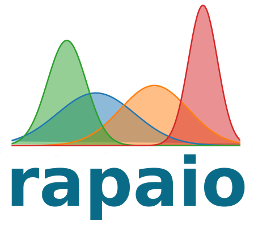

In [2]:
%image https://raw.githubusercontent.com/padreati/rapaio/master/docs/logo/logo-medium.png

## JShell commands

Some JShell commands are implemented. For example you can inspect which variables are defined

In [8]:
%jshell /vars

|    int result = 4
|    Complex x = Complex[a=10.0, b=20.0]
|    Complex $1 = Complex[a=11.0, b=21.0]
|    Faker faker = com.github.javafaker.Faker@60e33ce3
|    String $2 = "Herb Heaney"


or the types you defined in this session

In [9]:
%jshell /types

|    record Complex


## Execute bash commands
You can execute bash scripting commands. Here we display the java version number.

In [10]:
%%bash
java --version

openjdk 20.0.1 2023-04-18
OpenJDK Runtime Environment Corretto-20.0.1.9.1 (build 20.0.1+9-FR)
OpenJDK 64-Bit Server VM Corretto-20.0.1.9.1 (build 20.0.1+9-FR, mixed mode, sharing)


You can even define variables. In fact all the lines below cell magic marker are executed as a bash script.

In [11]:
%%bash
name="John"
echo "Hello $name"

Hello John


## Display data

You can display data. For example we display a markdown snippet and we direct the output interpretation of the snippet through MIME type.

In [15]:
String id = display("text/markdown", "Markdown *test* **snippet**:\n* bullet 1\n* bullet 2")

Html test snippet : bullet 1 bullet 2

Notice that we captured the id of the display. This id can be used to update the same display with a different content. For example we can update the content of that display with a html snippet, using the MIME type for interpretation.

In [16]:
updateDisplay(id, "text/html", 
              "Html <i>test</i> <b>snippet</b>:<p><ulist><li>bullet 1</li><li>bullet 2</li></ulist></p>")

Hope you enjoy it. Please cut issues for any bad behavior or new feature proposal.